# Tittle
MUSCLE PHYSIOLOGY

# Purpose
In this laboratory, several experimental procedures will be used to investigate the different contraction characteristics of skeletal, cardiac, and smooth muscle. The effects of the neurotransmitters, acetylcholine and norepinephrine, on the rates of contraction of
cardiac and smooth muscle will be examined. A procedure for recording an
electromyogram (EMG) and the effect of oxygen availability to skeletal muscles will also be demonstrated.

# Procedure
1.
To get things started:Before you turn anything on, be sure the
IWX/214 unit is plugged in, and that the IWX/214 unit is connected to the laptop by USB cable.Be sure that the CAAMI 504 EEG cable is inserted into the isolated inputs of Channels 1 and 2 of the IWX/214. Be sure that the
color coded lead wires
are correctly inserted in the lead pedestal of the CAAMI 504 EEG cable. Insert the connectors on the electrode lead wires into the color coded matching sockets on the lead pedestal of the ECG cable.Once everything is connected,FIRST turn on the laptop and allow it to fully boot up
before you turn on the IWX/214 unit. Once the Iworx unit is on, the red indicator light on the Iworx unit should light up and you may hear the USB chime from the laptop if the laptop does not default to mute (many are set to default to mute).
2.
Open the Labscribe3 program by clicking on the Labscribe3 icon on thedesktop. As soon as the programopens, you should see a window pop up that says “Hardware foundIWX214:2008 124,” click “OK.”61
3.
In the second from the top row (the row that says “File Edit View Tools Settings Advanced External Devices Help”), click on the “
Settings” tab. About halfway down the dropdown window should be a tab called “Human Muscle.” Click on that tab and that should lead you to
another dropdown list with the second tab from the top called
“AntagonisticMuscle,” click on that tab and the close the pdf file that
appears, you don’t need it.
4.
Instruct the subject to remove all jewelry from his/her arm and wrist. Use an alcohol swab to clean the regions of skin on the forearm you are going to use (Fig. 91.). Let the area dry. Remove a disposable electrode from
its plastic shield, and apply the electrode to the six locations.
5.
Place the electrodes from proximal to distal on the forearm in the following order:+2,2 on the posterior and +1,1 and ground on the anterior
(Fig.91.) Snap the lead wires onto the electrodes as follows the red  +1
” lead is attached to the proximal electrode on theanterior surface the black 1 lead is attached to the distal electrode on the anterior forearm.
The green “C” lead (the ground) is attached to the remaining electrode on the anterior surface.the white “+2” lead is attached to the proximal electrode on the posterior forearm.the brown “2” lead is attached to
the distal electrode on the posterior surface.The experimental set up should look like the illustration in Fig. 92.Fig. 91Electrode placement
Fi g. 92 Experimental setup 62.
6.
Record an EMG of
the muscles of the forearm illustrating agonistic and antagonistic
muscle activity for each of the exercises described below.Type
the student’s name and the appropriate letter for the activity
(A, B, C, D see below)in the Mark box to the right of the Mark button.
Click the red“Rec” button.




# Results


In [5]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dfr = pd.read_csv (r'./Caro1.txt', sep = '\t')
dfr

,Time,EMG,Muscle Force
0,0.000,0.000000,0.197806
1,0.001,0.000000,0.197433
2,0.002,0.000000,0.197433
3,0.003,0.000000,0.197433
4,0.004,0.000000,0.197433
...,...,...,...
60699,60.699,0.072174,0.192961
60700,60.700,-0.005325,0.192961
60701,60.701,-0.067323,0.192961
60702,60.702,-0.051317,0.192961


In [14]:
dfl = pd.read_csv (r'./betty1.txt', sep = '\t')
dfl

,Time,EMG,Muscle Force
0,0.000,0.000000,0.196315
1,0.001,0.000000,0.196315
2,0.002,0.000000,0.196315
3,0.003,0.000000,0.196315
4,0.004,0.000000,0.196315
...,...,...,...
60571,60.571,-0.117228,0.191470
60572,60.572,0.113270,0.191470
60573,60.573,0.081846,0.191470
60574,60.574,-0.001693,0.191470


Text(0, 0.5, 'EMG (Volts)')

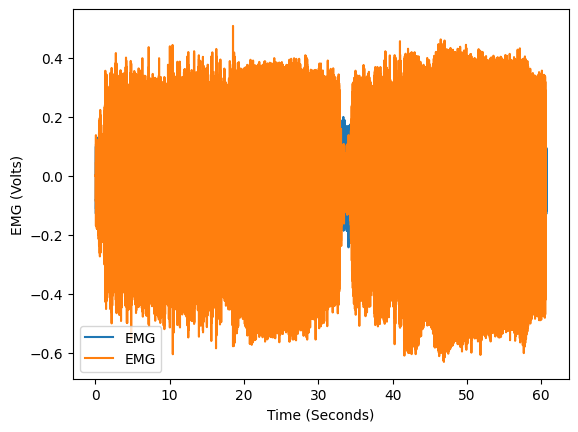

In [15]:
fig, ax = plt.subplots()
dfr.plot.line(ax = ax, y = 'EMG', x = 'Time')
dfl.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [37]:
# Define the parameters
window_size = 3  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 3 # Step size in seconds (how often you want to check the window size)

In [38]:
# Initialize lists to store the calculated max values
max_values_r = []
time_intervals_r = []

max_values_l = []
time_intervals_l = []

# Iterate through the data in steps for dfr
for i in range(0, len(dfr), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfr):
        window_data = dfr.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_r.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_r.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfr
result_df_r = pd.DataFrame({'Time': time_intervals_r, 'MaxEMG_R': max_values_r})

# Iterate through the data in steps for dfl
for i in range(0, len(dfl), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(dfl):
        window_data = dfl.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values_l.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals_l.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals for dfl
result_df_l = pd.DataFrame({'Time': time_intervals_l, 'MaxEMG_L': max_values_l})

# Calculate the percentage of max EMG for each 0.5 seconds interval for both dfr and dfl
result_df_r['MaxEMG_percent_R'] = (result_df_r['MaxEMG_R'] / result_df_r['MaxEMG_R'].max()) * 100
result_df_l['MaxEMG_percent_L'] = (result_df_l['MaxEMG_L'] / result_df_l['MaxEMG_L'].max()) * 100

# Display the results
print(result_df_r)
print(result_df_l)

       Time  MaxEMG_R  MaxEMG_percent_R
0    1.4995  0.218256         85.958355
1    4.4995  0.249096         98.104439
2    7.4995  0.227274         89.510021
3   10.4995  0.205974         81.121189
4   13.4995  0.200266         78.873140
5   16.4995  0.189834         74.764581
6   19.4995  0.204703         80.620616
7   22.4995  0.247146         97.336447
8   25.4995  0.171985         67.734897
9   28.4995  0.209612         82.553986
10  31.4995  0.201226         79.251228
11  34.4995  0.226124         89.057103
12  37.4995  0.253909        100.000000
13  40.4995  0.226119         89.055134
14  43.4995  0.216409         85.230929
15  46.4995  0.245412         96.653525
16  49.4995  0.212474         83.681161
17  52.4995  0.194717         76.687711
18  55.4995  0.191658         75.482949
19  58.4995  0.176575         69.542631
       Time  MaxEMG_L  MaxEMG_percent_L
0    1.4995  0.415469         81.883238
1    4.4995  0.400126         78.859343
2    7.4995  0.435538         85.838563


In [45]:
threshold = 72

In [46]:
reached_threshold_R = result_df_r[result_df_r['MaxEMG_percent_R'] <= threshold]
time_at_threshold_R = reached_threshold_R['Time'].iloc[0]
reached_threshold_L = result_df_l[result_df_l['MaxEMG_percent_L'] <= threshold]
time_at_threshold_L = reached_threshold_L['Time'].iloc[0]
print(f"Time at ~{threshold} % of max for right hand: {time_at_threshold_R} seconds")
print(f"Time at ~{threshold} % of max for left hand: {time_at_threshold_L} seconds")

Time at ~72 % of max for right hand: 25.4995 seconds
Time at ~72 % of max for left hand: 34.4995 seconds


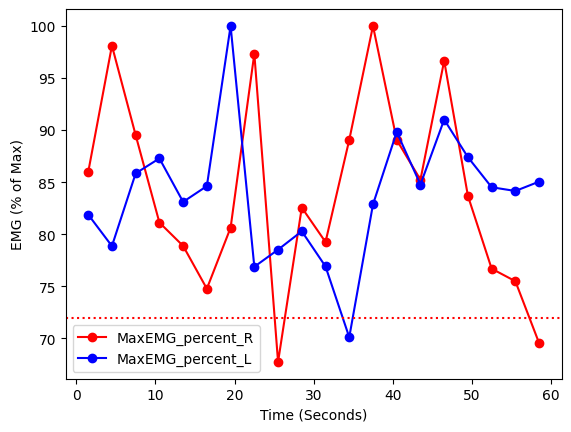

In [47]:
fig, ax = plt.subplots()
result_df_r.plot.line(ax = ax, y = 'MaxEMG_percent_R', x = 'Time', color = 'r', marker = 'o')
result_df_l.plot.line(ax = ax, y = 'MaxEMG_percent_L', x = 'Time', color = 'b', marker = 'o')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')

Text(0.5, 1.0, 'Fatigability Assay - Right vs Left Hand')

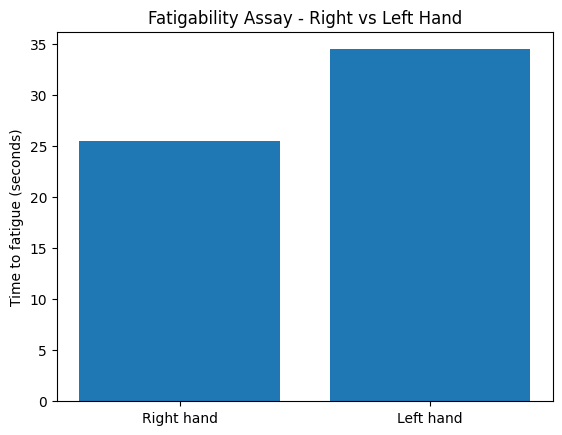

In [48]:
# build a bar plot
plt.bar(['Right hand', 'Left hand'],[time_at_threshold_R, time_at_threshold_L])
plt.ylabel('Time to fatigue (seconds)')
plt.title('Fatigability Assay - Right vs Left Hand')

# Discussion
This exercise will demonstrate the concepts of agonist, antagonist and synergist muscles. An agonist, or prime mover, is the muscle primarily responsible for a given
movement. An antagonist muscle will work in opposition to the agonist. A synergist will
aid the agonist and help refine a given movement.

# Conclusion
With this experiment I saw a small difference in the fatigillity on the right arm. Not a big difference but got down to the 30th percentile.